# The lines before the header were manually removed

New Code with pickle

In [1]:
import pandas as pd
import pickle

# Load the data
try:
    with open("data/county_westmeath.pkl", "rb") as f:
        county_westmeath = pickle.load(f)
except FileNotFoundError:
    county_westmeath = pd.read_csv("data/dly875_westmeath-mullingar.csv")
    county_westmeath["date"] = pd.to_datetime(county_westmeath["date"])
    county_westmeath = county_westmeath[(county_westmeath["date"].dt.year >= 2018) & (county_westmeath["date"].dt.year <= 2022)]


In [2]:
county_westmeath = county_westmeath.loc[:, ~county_westmeath.columns.str.startswith(('ind', 'file'))]

In [3]:
# Assuming df is the name of your dataframe
county_westmeath= county_westmeath.replace(r'\s+', 777444, regex=True)


In [4]:
for column in county_westmeath.columns:
    # get the indices of the rows that contain 777444
    indices = county_westmeath[county_westmeath[column] == 777444].index.tolist()
    
    # get the date column values for those indices
    dates = county_westmeath.loc[indices, 'date'].tolist()
    
    # print the results
    print(f'The value of 777444 occurred {len(indices)} times in {column} on the following dates: {dates}.')

The value of 777444 occurred 0 times in date on the following dates: [].
The value of 777444 occurred 0 times in maxtp on the following dates: [].
The value of 777444 occurred 0 times in mintp on the following dates: [].
The value of 777444 occurred 0 times in igmin on the following dates: [].
The value of 777444 occurred 0 times in gmin on the following dates: [].
The value of 777444 occurred 0 times in rain on the following dates: [].
The value of 777444 occurred 0 times in cbl on the following dates: [].
The value of 777444 occurred 0 times in wdsp on the following dates: [].
The value of 777444 occurred 0 times in hm on the following dates: [].
The value of 777444 occurred 0 times in ddhm on the following dates: [].
The value of 777444 occurred 0 times in hg on the following dates: [].
The value of 777444 occurred 0 times in soil on the following dates: [].
The value of 777444 occurred 0 times in pe on the following dates: [].
The value of 777444 occurred 0 times in evap on the fol

In [5]:
county_westmeath[["glorad","hm","ddhm"]] = county_westmeath[["glorad","hm","ddhm"]].astype("int64")

In [6]:
# Convert multiple columns to float data type
columns_to_convert = ["gmin", "rain", "cbl", "wdsp", "soil", "pe", "evap", "smd_wd", "smd_md", "smd_pd"]
county_westmeath[columns_to_convert] = county_westmeath[columns_to_convert].astype(float)


In [7]:
with open("data/county_westmeath.pkl", "wb") as f:
        pickle.dump(county_westmeath, f)

In [1]:
import pandas as pd
import pickle

with open("data/county_westmeath.pkl", "rb") as f:
    county_westmeath = pickle.load(f)

In [2]:
print(county_westmeath.dtypes)

date              datetime64[ns]
maxtp                    float64
mintp                    float64
igmin                     object
gmin                     float64
rain                     float64
cbl                      float64
wdsp                     float64
hm                         int64
ddhm                       int64
hg                        object
soil                     float64
pe                       float64
evap                     float64
smd_wd                   float64
smd_md                   float64
smd_pd                   float64
glorad                     int64
rainfall_class              bool
dtype: object


In [12]:
county_westmeath['rainfall_class'] = county_westmeath['rain'] != 0

In [13]:
with open("data/county_westmeath.pkl", "wb") as f:
        pickle.dump(county_westmeath, f)

Starting point from loading Pkl file

In [1]:
import pandas as pd
import pickle

with open("data/county_westmeath.pkl", "rb") as f:
    county_westmeath = pickle.load(f)


In [2]:
county_westmeath.dtypes

date              datetime64[ns]
maxtp                    float64
mintp                    float64
igmin                     object
gmin                     float64
rain                     float64
cbl                      float64
wdsp                     float64
hm                         int64
ddhm                       int64
hg                        object
soil                     float64
pe                       float64
evap                     float64
smd_wd                   float64
smd_md                   float64
smd_pd                   float64
glorad                     int64
rainfall_class              bool
dtype: object

In [3]:
county_westmeath.head()

,date,maxtp,mintp,igmin,gmin,rain,cbl,wdsp,hm,ddhm,hg,soil,pe,evap,smd_wd,smd_md,smd_pd,glorad,rainfall_class
16125,2018-01-01,7.9,1.4,0,0.1,0.6,987.2,8.2,16,270,28,4.239,0.4,0.4,0.0,-0.2,-9.7,276,True
16126,2018-01-02,10.0,0.5,0,-3.0,11.0,982.9,10.6,23,240,47,4.746,0.5,0.6,0.0,-10.0,-10.0,124,True
16127,2018-01-03,8.1,4.6,0,2.7,3.2,979.0,10.9,17,250,35,5.141,0.6,0.7,0.0,-2.6,-10.0,136,True
16128,2018-01-04,8.6,1.8,0,2.6,9.0,976.9,7.0,20,290,32,4.927,0.2,0.3,0.0,-8.8,-10.0,175,True
16129,2018-01-05,6.2,-0.6,0,-5.1,0.2,982.7,4.7,9,190,14,3.759,0.0,0.1,0.0,-0.2,-9.7,278,True


In [16]:
county_westmeath.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
maxtp,1826.0,13.666977,5.306894,-1.800,9.6000,13.5500,17.600,30.4
mintp,1826.0,5.709529,4.671751,-8.200,2.3000,5.6000,9.400,17.8
gmin,1826.0,3.575904,5.619634,-12.500,-0.3750,3.4000,7.800,17.1
rain,1826.0,2.701917,4.718902,0.000,0.0000,0.6000,3.600,71.1
cbl,1826.0,1000.859365,12.134997,960.200,992.7000,1002.1000,1009.400,1033.4
wdsp,1826.0,6.117579,2.623653,1.400,4.1000,5.7000,7.700,16.4
hm,1826.0,11.274918,4.016950,3.000,8.0000,11.0000,14.000,29.0
ddhm,1826.0,190.974808,82.236095,0.000,140.0000,200.0000,260.000,350.0
soil,1826.0,11.157734,5.046585,1.147,6.7665,10.8615,15.670,23.4
pe,1826.0,1.420701,1.093387,0.000,0.5000,1.2000,2.200,5.4


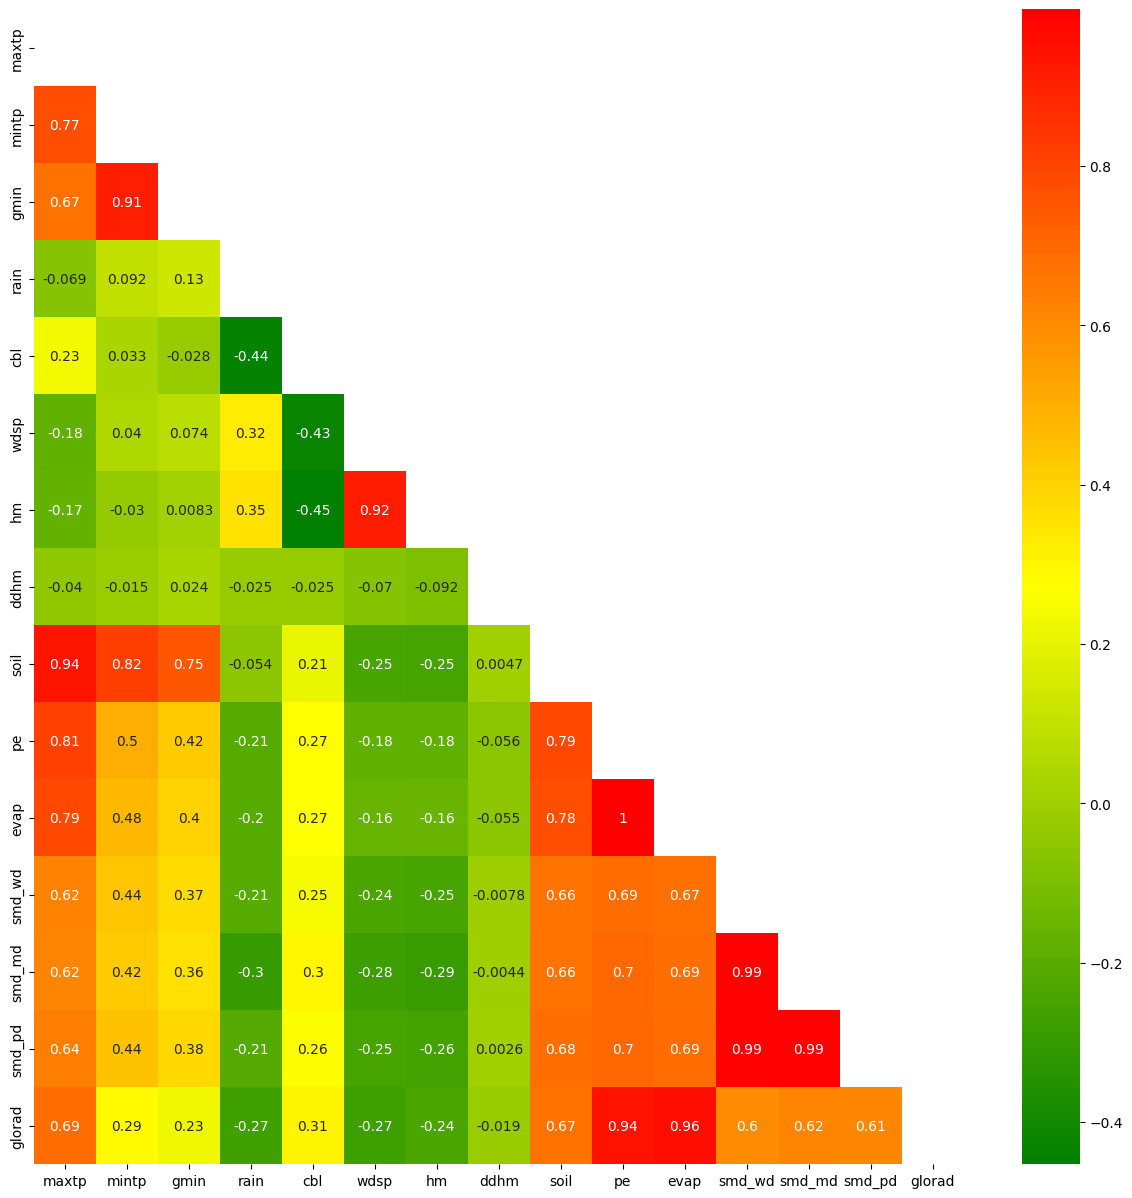

In [17]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Define the colors for the colormap
colors = ['green', 'yellow', 'red']

# Create the colormap
cmap = LinearSegmentedColormap.from_list('green_yellow_red', colors)

# Plot correlation matrix for numerical variables in shanon dataset except date,ind.5,ind.4,ind.3,ind.2,ind.1
num_cols = county_westmeath.select_dtypes(include="number").filter(regex='^(?!ind)').columns  
corr = county_westmeath[num_cols].corr(method="pearson")
plt.figure(figsize=(15, 15))
# Create a lower triangular heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True,cmap=cmap)
plt.savefig("westmeath_heatmap_pearson.png")

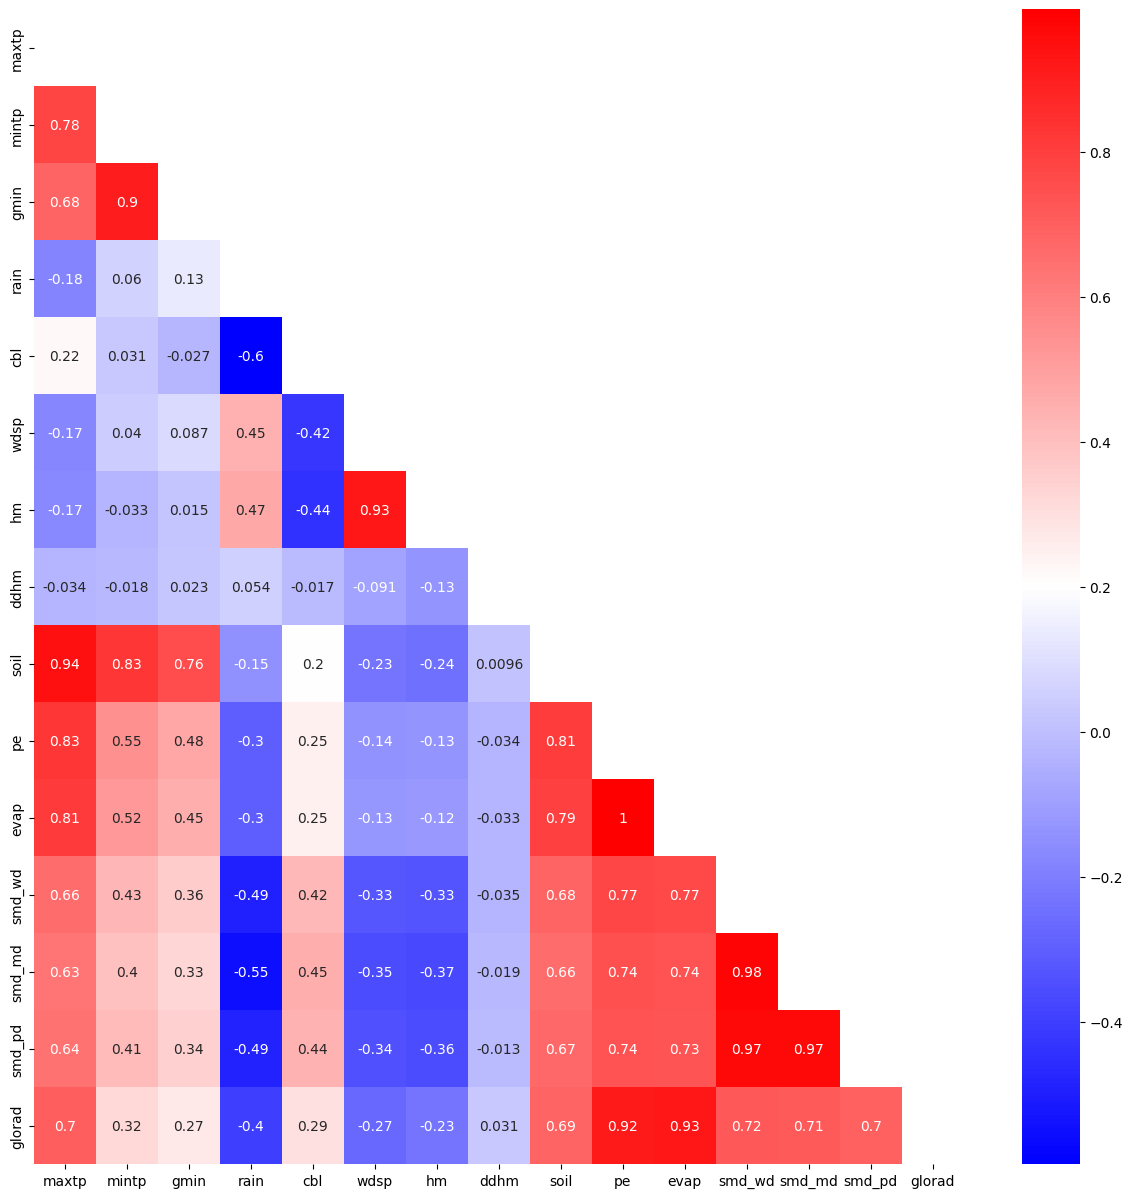

In [18]:
num_cols = county_westmeath.select_dtypes(include="number").filter(regex='^(?!ind)').columns     
corr = county_westmeath[num_cols].corr(method="spearman")
plt.figure(figsize=(15, 15))
# Create a lower triangular heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True,cmap="bwr")
plt.savefig("westmeath_heatmap_spearman.png")

In [6]:
from sklearn.preprocessing import PowerTransformer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, confusion_matrix, balanced_accuracy_score

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_westmeath.drop(['rainfall_class','date'], axis=1)
y = county_westmeath['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def test_model(name, model):
    # Fit model on train set
    model.fit(X_train, y_train)
    
    # Predict on test set
    y_pred = model.predict(X_test)

    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred > 0.5)

    # Return a list of values for each metric
    values = [auc_pr, auc_roc, sensitivity, specificity, balanced_accuracy]
    return values

# Create a list of model names and instances
models = [
    ("Logistic regression", LogisticRegression()),
    ("Random forest", RandomForestClassifier()),
    ("KNN Classifier", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive boosting", AdaBoostClassifier()),
    ("Extreme gradient boosting", XGBClassifier())
]

# Create a table with pandas
import pandas as pd
metrics = ["AUC-PR", "AUC-ROC", "Sensitivity", "Specificity", "Balanced Accuracy"]
table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Sensitivity,Specificity,Balanced Accuracy
0,Logistic regression,0.993,0.987,0.974,1.000,0.987
1,Random forest,1.000,1.000,1.000,1.000,1.000
2,KNN Classifier,0.920,0.865,0.878,0.853,0.865
3,Adaptive boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme gradient boosting,1.000,1.000,1.000,1.000,1.000


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_westmeath.drop(['rainfall_class', 'date', 'hm'], axis=1)
y = county_westmeath['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe

table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)



,Model,AUC-PR,AUC-ROC,Balanced Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.995,0.991,0.982,1.000,0.991
1,Random Forest,1.000,1.000,1.000,1.000,1.000
2,KNN,0.925,0.874,0.886,0.863,0.874
3,Adaptive Boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme Gradient Boosting,1.000,1.000,1.000,1.000,1.000


Removing Minimum Temperature

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_westmeath.drop(['rainfall_class','date', 'mintp'], axis=1)
y = county_westmeath['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe

table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)



,Model,AUC-PR,AUC-ROC,Balanced Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.994,0.989,0.978,1.000,0.989
1,Random Forest,1.000,1.000,1.000,1.000,1.000
2,KNN,0.919,0.864,0.875,0.853,0.864
3,Adaptive Boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme Gradient Boosting,1.000,1.000,1.000,1.000,1.000


Removing soil

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_westmeath.drop(['date','rainfall_class', 'soil'], axis=1)
y = county_westmeath['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe

table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)



,Model,AUC-PR,AUC-ROC,Balanced Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.995,0.991,0.982,1.000,0.991
1,Random Forest,1.000,1.000,1.000,1.000,1.000
2,KNN,0.921,0.867,0.882,0.853,0.867
3,Adaptive Boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme Gradient Boosting,1.000,1.000,1.000,1.000,1.000


Dropping pe

In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_westmeath.drop(['date','rainfall_class', 'pe'], axis=1)
y = county_westmeath['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe

table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)



,Model,AUC-PR,AUC-ROC,Balanced Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.993,0.987,0.974,1.000,0.987
1,Random Forest,1.000,1.000,1.000,1.000,1.000
2,KNN,0.919,0.866,0.889,0.842,0.866
3,Adaptive Boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme Gradient Boosting,1.000,1.000,1.000,1.000,1.000


Dropping hg

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_westmeath.drop(['date','rainfall_class', 'hg'], axis=1)
y = county_westmeath['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe

table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)



,Model,AUC-PR,AUC-ROC,Balanced Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.994,0.989,0.978,1.000,0.989
1,Random Forest,1.000,1.000,1.000,1.000,1.000
2,KNN,0.922,0.871,0.889,0.853,0.871
3,Adaptive Boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme Gradient Boosting,1.000,1.000,1.000,1.000,1.000


Dropping Smd_wd

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_westmeath.drop(['date','rainfall_class', 'smd_wd'], axis=1)
y = county_westmeath['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe

table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Balanced Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.993,0.987,0.974,1.000,0.987
1,Random Forest,1.000,1.000,1.000,1.000,1.000
2,KNN,0.919,0.864,0.875,0.853,0.864
3,Adaptive Boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme Gradient Boosting,1.000,1.000,1.000,1.000,1.000


Dropping Smd_md 

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_westmeath.drop(['date','rainfall_class', 'smd_md'], axis=1)
y = county_westmeath['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe

table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Balanced Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.995,0.991,0.982,1.000,0.991
1,Random Forest,1.000,1.000,1.000,1.000,1.000
2,KNN,0.916,0.860,0.878,0.842,0.860
3,Adaptive Boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme Gradient Boosting,1.000,1.000,1.000,1.000,1.000


Dropping all previously mentioned columns

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import average_precision_score, roc_auc_score, balanced_accuracy_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Random Forest", RandomForestClassifier()),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("Adaptive Boosting", AdaBoostClassifier()),
    ("Extreme Gradient Boosting", XGBClassifier())
]

# Define the performance metrics
metrics = ["AUC-PR", "AUC-ROC", "Balanced Accuracy", "Sensitivity", "Specificity"]

# Initialize an empty dataframe to store the results
results = pd.DataFrame(columns=["Model"] + metrics)

# Split data into features and target
X = county_westmeath.drop(['date','rainfall_class','hg','hm','pe','soil','mintp','smd_wd','smd_md'], axis=1)
y = county_westmeath['rainfall_class']

# Scale the features
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Loop over the models and evaluate each one
for name, model in models:
    # Fit the model on the training set
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate the performance metrics
    auc_pr = average_precision_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred > 0.5) # You can choose a different threshold
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Add the results to the dataframe

table = pd.DataFrame(columns=["Model"] + metrics) # Add a column for the model name

# Loop over the models and test each one
for name, model in models:
   values = test_model(name, model) # Get the values from the function
   table.loc[len(table)] = [name] + values # Add a row to the table with the name and values

table[metrics] = table[metrics].round(3) # Format the values to 3 decimal places

# Display the table
display(table)

,Model,AUC-PR,AUC-ROC,Balanced Accuracy,Sensitivity,Specificity
0,Logistic Regression,0.996,0.993,0.985,1.000,0.993
1,Random Forest,1.000,1.000,1.000,1.000,1.000
2,KNN,0.929,0.879,0.875,0.884,0.879
3,Adaptive Boosting,1.000,1.000,1.000,1.000,1.000
4,Extreme Gradient Boosting,1.000,1.000,1.000,1.000,1.000


In [28]:
#pip install lofo-importance

In [15]:
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
from lofo import LOFOImportance, Dataset, plot_importance
%matplotlib inline

C:\Users\meatefza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\lofo\lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [16]:
# extract a sample of the data
sample_westmeath =county_westmeath.drop(['date','rain'], axis=1)
#sample_df.sort_values("columnid", inplace=True) # Sort by time for time split validation

In [17]:
# define the validation scheme
cv4_westmeath = KFold(n_splits=4, shuffle=False, random_state=None) # Don't shuffle to keep the time split split validation

In [19]:
# define the binary target and the features
datasetwestmeath = Dataset(df=sample_westmeath, target="rainfall_class", features=[col for col in sample_westmeath.columns if col != "rainfall_class"])

In [20]:
from sklearn.linear_model import LogisticRegression
# change the default model to logistic regression
log_reg = LogisticRegression()
lofo_implogwestmeath = LOFOImportance(datasetwestmeath, cv=cv4_westmeath, scoring="roc_auc", model=log_reg)

In [21]:
# get the mean and standard deviation of the importances in pandas format
importance_dflogwestmeath = lofo_implogwestmeath.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

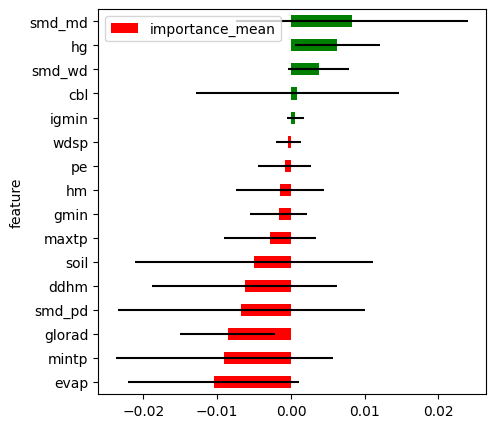

In [22]:
# plot the means and standard deviations of the importances
plot_importance(importance_dflogwestmeath, figsize=(5, 5))

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_cls =  RandomForestClassifier()
lofo_imprandomforestwestmeath = LOFOImportance(datasetwestmeath, cv=cv4_westmeath, scoring="roc_auc", model=rf_cls)

In [24]:
importance_dfforestwestmeath = lofo_imprandomforestwestmeath.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

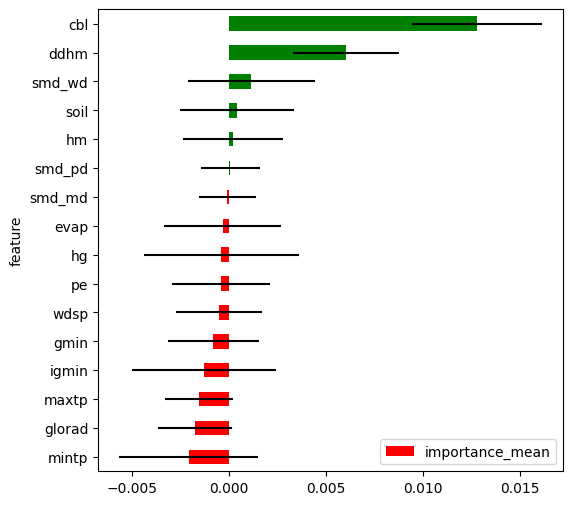

In [38]:
plot_importance(importance_dfforestwestmeath, figsize=(6, 6))

In [25]:
from sklearn.neighbors import KNeighborsClassifier
rf_knn =  KNeighborsClassifier(n_neighbors=5)
lofo_impknnwestmeath = LOFOImportance(datasetwestmeath, cv=cv4_westmeath, scoring="roc_auc", model=rf_knn)
importance_knnwestmeath = lofo_impknnwestmeath.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

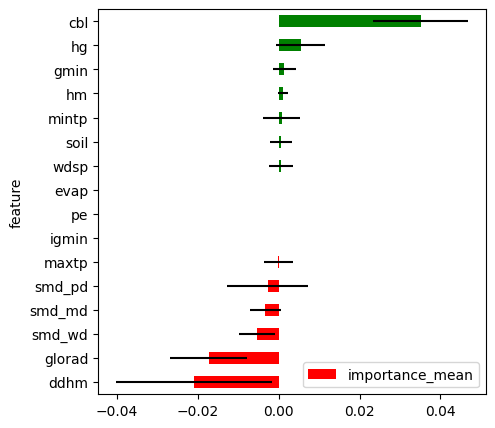

In [26]:
plot_importance(importance_knnwestmeath, figsize=(5, 5))

In [28]:
from sklearn.ensemble import AdaBoostClassifier
rf_adabooosterwestmeath =  AdaBoostClassifier()
lofo_impadaboosterwestmeath = LOFOImportance(datasetwestmeath, cv=cv4_westmeath, scoring="roc_auc", model=rf_adabooosterwestmeath)
importance_adawestmeath = lofo_impadaboosterwestmeath.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

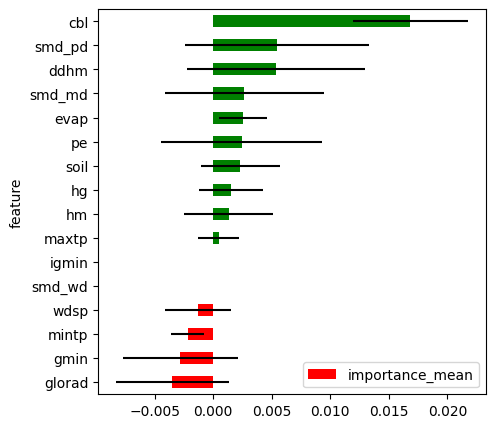

In [44]:
plot_importance(importance_adawestmeath, figsize=(5, 5))

In [29]:
from xgboost import XGBClassifier
rf_xgbboosterwestmeath =  XGBClassifier()
lofo_impxgbboosterwestmeath = LOFOImportance(datasetwestmeath, cv=cv4_westmeath, scoring="roc_auc", model=rf_xgbboosterwestmeath)
importance_xgbwestmeath = lofo_impxgbboosterwestmeath.get_importance()

  0%|          | 0/16 [00:00<?, ?it/s]

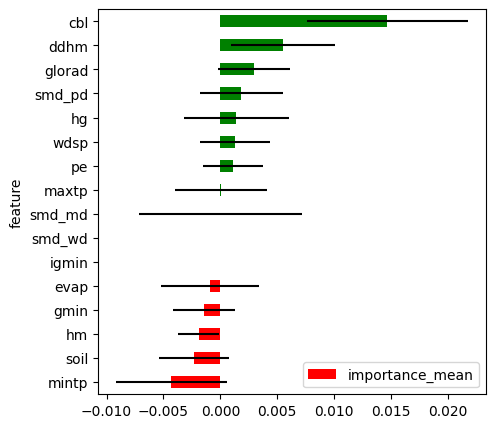

In [30]:
plot_importance(importance_xgbwestmeath, figsize=(5, 5))

In [31]:
import shap
shap.initjs() 

Logistic Regression - SHAP Values

Permutation explainer: 367it [00:18, 11.91it/s]                         


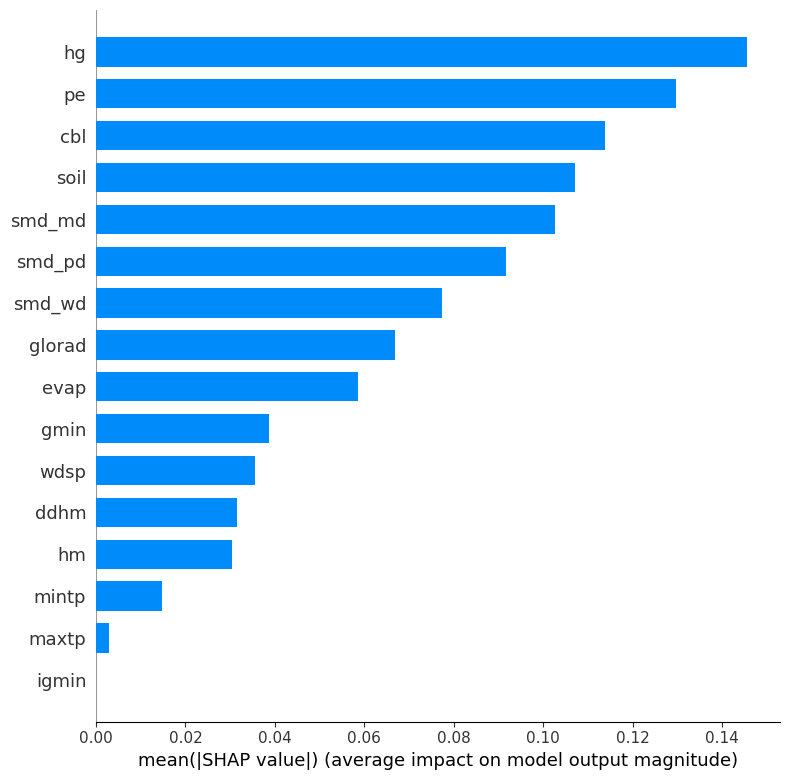

In [32]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_westmeath.drop(['date','rain','rainfall_class'], axis=1)
y = county_westmeath['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logregwestmeath = LogisticRegression().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainerlogregwestmeath = shap.Explainer(logregwestmeath.predict, X_train)
shap_valueslogregwestmeath = explainerlogregwestmeath(X_test)

shap.summary_plot(shap_valueslogregwestmeath, X_test, plot_type="bar")

XGB Classifier

Permutation explainer: 367it [00:30,  7.84it/s]                         


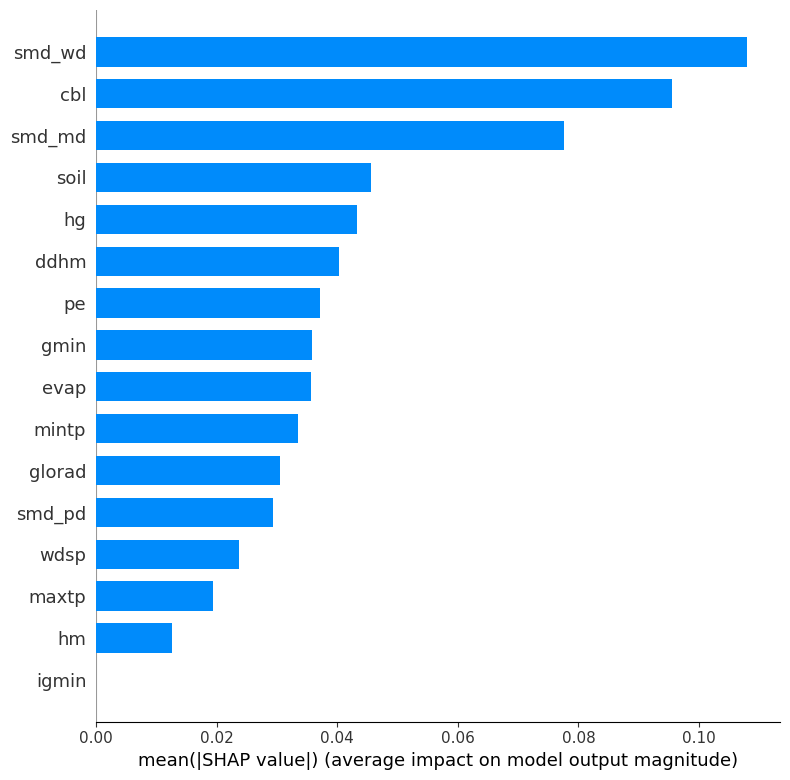

In [33]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_westmeath.drop(['date','rain','rainfall_class'], axis=1)
y = county_westmeath['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelxgbwestmeath = XGBClassifier().fit(X_train, y_train)
# explain the model's predictions using SHAP
explainerxgbwestmeath = shap.Explainer(modelxgbwestmeath.predict,X_train)
shap_xgbwestmeath = explainerxgbwestmeath(X_test)
# visualize the first prediction's explanation
shap.summary_plot(shap_xgbwestmeath, X_test, plot_type="bar")

AdaBoost Classifier

Permutation explainer: 367it [03:16,  1.80it/s]                         


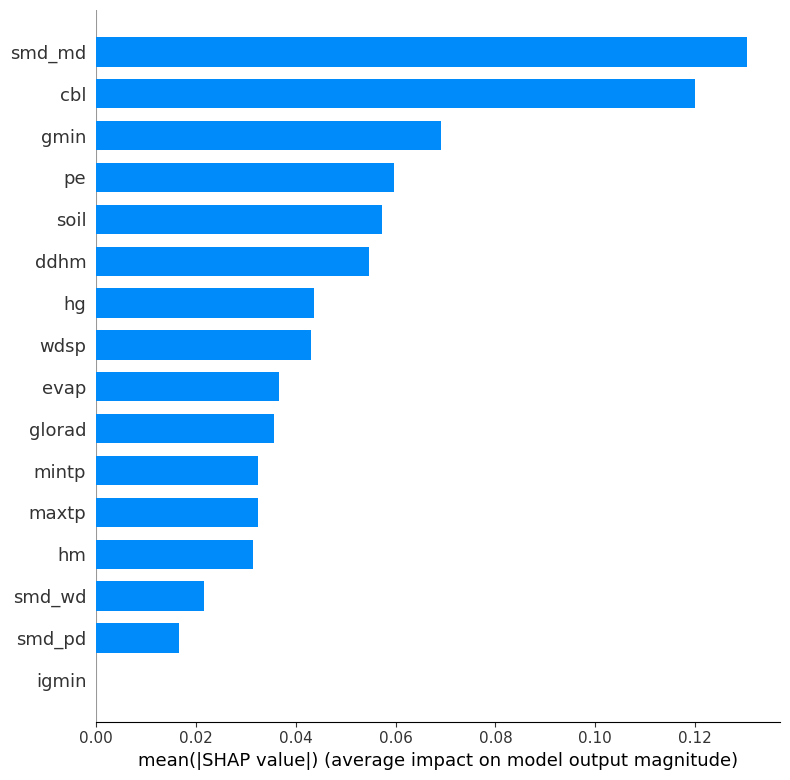

In [34]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
# Split data into features and target
X = county_westmeath.drop(['date','rain','rainfall_class'], axis=1)
y = county_westmeath['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


adboostwestmeath = AdaBoostClassifier().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_adaboostwestmeath = shap.Explainer(adboostwestmeath.predict,X_train)
shap_adaboostwestmeath = explainer_adaboostwestmeath(X_test)

shap.summary_plot(shap_adaboostwestmeath, X_test, plot_type="bar")

Random Forest Classifier

Permutation explainer: 367it [05:05,  1.15it/s]                         


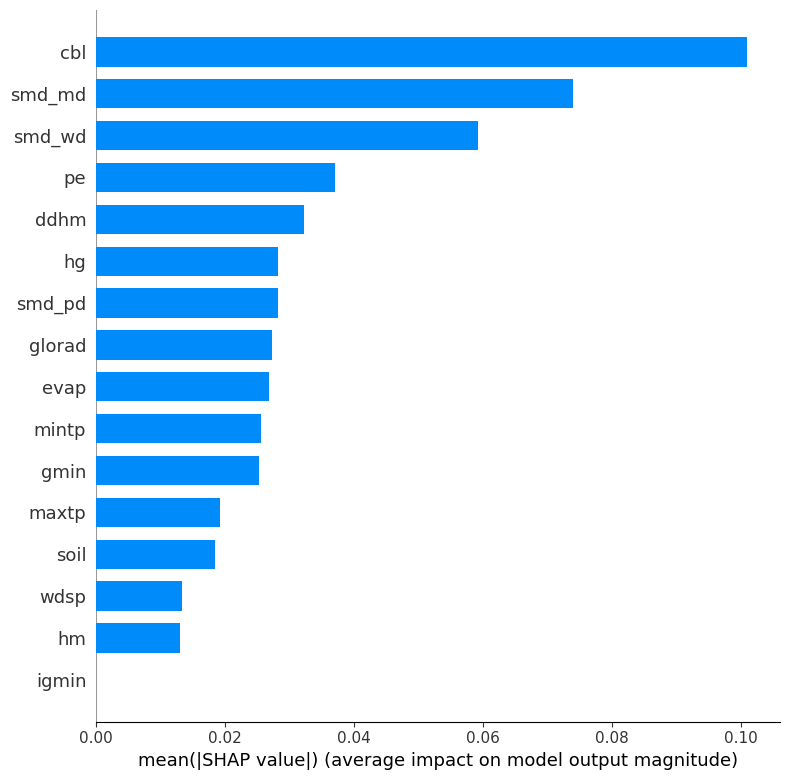

In [35]:
import pandas as pd
import numpy as np
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_westmeath.drop(['date','rain','rainfall_class'], axis=1)
y = county_westmeath['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_westmeath = RandomForestClassifier().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_rf_westmeath = shap.Explainer(rf_westmeath.predict, X_train)
shap_rf_westmeath = explainer_rf_westmeath(X_test)

# visualize the first prediction's explanation
shap.summary_plot(shap_rf_westmeath, X_test, plot_type="bar")

KNN Classifier

Permutation explainer: 367it [30:29,  5.01s/it]                         


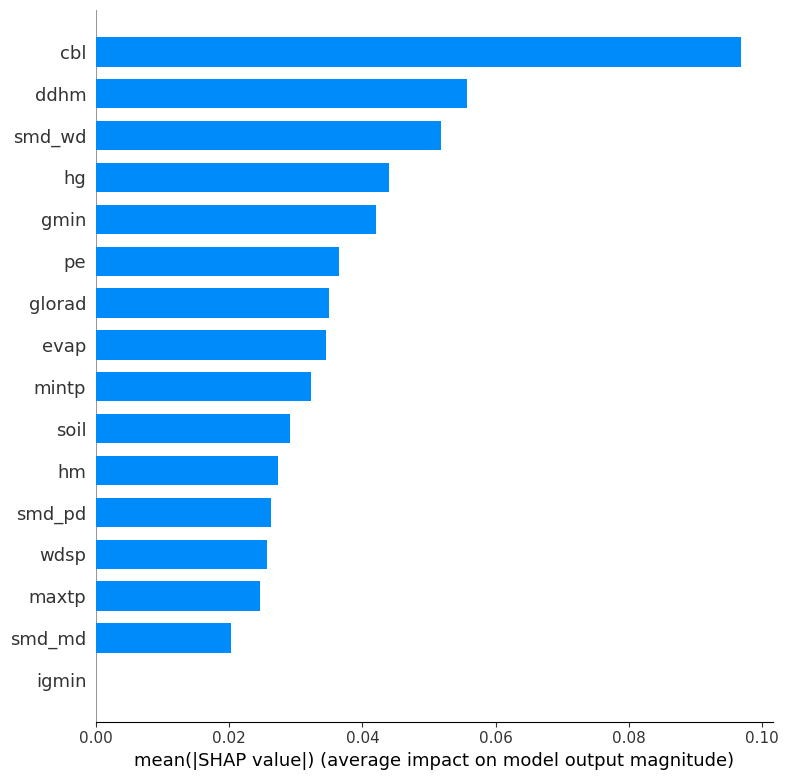

In [36]:
import pandas as pd
import numpy as np
import shap
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split


# Import matplotlib for plotting
import matplotlib.pyplot as plt
# Split data into features and target
X = county_westmeath.drop(['date','rain','rainfall_class'], axis=1)
y = county_westmeath['rainfall_class']
scaler = PowerTransformer(method='yeo-johnson')
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_westmeath = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer_knnclassifierwestmeath = shap.Explainer(knn_westmeath.predict, X_train)
shap_values_knnclassifier = explainer_knnclassifierwestmeath(X_test)

shap.summary_plot(shap_values_knnclassifier, X_test, plot_type="bar")